# Dipping model

This notebook produces a set of inclined prisms.

In [1]:
import matplotlib as mpb
# show the figures in windows

# show all the matplotlib backends 
#mpb.rcsetup.all_backends

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
import cPickle as pickle
from fatiando import utils
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import plot_functions as pf

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [4]:
model = dict()

In [5]:
# importing the pickle file of results
result_path = '../anitapolis/results/multiple-43485/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [6]:
model['prisms'] = inversion['results'][4][2][-1]

In [7]:
d = pd.read_csv('../anitapolis/anitapolis_mag.txt', header=0, sep=' ')

In [8]:
x = d['X'] - np.mean(d['X'])
y = d['Y'] - np.mean(d['Y'])

In [9]:
for m in model['prisms']:
    m.x -= np.mean(d['X'])
    m.y -= np.mean(d['Y'])
    m.x = np.sin(np.pi)*m.y + np.cos(np.pi)*m.x
    m.y = np.cos(np.pi)*m.y - np.sin(np.pi)*m.x

In [10]:
dz = model['prisms'][0].z2 - model['prisms'][0].z1

In [11]:
new_model = model['prisms'][:-2]
new_prism = deepcopy(model['prisms'][-2])
new_prism.x -= 800.
new_prism2 = deepcopy(model['prisms'][-1])
new_prism2.x -= 1000.

In [12]:
model['prisms'][-2].z1 += dz
model['prisms'][-2].z2 += dz
new_model.append(model['prisms'][-2])

In [13]:
new_prism2.z1 += dz
new_prism2.z2 += dz
new_model.append(new_prism2)

In [14]:
model['prisms'][-1].z1 += 2*dz
model['prisms'][-1].z2 += 2*dz
new_model.append(model['prisms'][-1])

In [15]:
for i,n in enumerate(new_model):
    n.z1 = i*380.
    n.z2 = (i+1)*380.

In [16]:
model['prisms'] = new_model

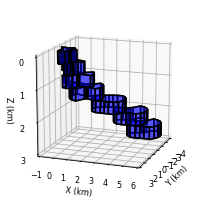

In [17]:
verts = pf.plot_prisms(model['prisms'], scale=0.001)

fig = plt.figure(figsize=(3.33,3.33))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, 
alpha=0.4, facecolor='b', linewidths=1.5, edgecolors='k'))

ax.set_xlim(-4, 3, 100)
ax.set_ylim(-1, 6, 100)
ax.set_zlim(3., 0, 100)
ax.tick_params(labelsize= 8, pad=2)
ax.set_xlabel('Y (km)', fontsize= 8, labelpad=0)
ax.set_ylabel('X (km)', fontsize= 8, labelpad=0)
ax.set_zlabel('Z (km)', fontsize= 8, labelpad=-2)
#ax.set_xticks(np.arange(-2.5, 3.5, 2))
#ax.set_yticks(np.arange(-2.5, 3.5, 2))
ax.set_zticks(np.arange(0, 7, 1))
ax

ax.view_init(15, 20)

plt.savefig('model.png', dpi=1200)
plt.show()

In [18]:
# model parameters
model['M'] = len(model['prisms'][0].x) # number of vertices per prism
model['L'] = len(model['prisms']) # number of prisms
model['P'] = model['L']*(model['M']+2) # number of parameters

model['z0'] = model['prisms'][0].z1    # depth of the top the shallowest prism
model['dz'] = (model['z0'] + model['prisms'][-1].z2)/model['L']    # thickness of each prism

model['inc'] = -50.  # inclination
model['dec'] = 9.   # declination
model['intensity'] = 12. # intensity

model['props']={'magnetization': utils.ang2vec(
    model['intensity'], model['inc'], model['dec'])} # physical property: magnetization

for m in model['prisms']:
    m.props = model['props']

### Saving in an outer file

In [20]:
file_name = 'model.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model, f)